<center><a target="_blank" href="https://academy.constructor.org/"><img src=https://lh3.googleusercontent.com/d/1EmH3Jks5CpJy0zK3JbkvJZkeqWtVcxhB width="800" style="background:none; border:none; box-shadow:none;" /></a> </center>

_____

# <h1 align="center"> Pandas Data Types and Plotting </h1>

<p style="margin-bottom:1cm;"></p>

_____

<center>Constructor Academy, 2024</center>


In [1]:
import pandas as pd
import numpy as np

import matplotlib
%matplotlib inline
import matplotlib.pyplot as plt

Let us read in some data and plot it. The data are yields on Swiss bonds over various durations (1-10 year, and 20 and 30 year).

In [2]:
# orig_url='https://drive.google.com/file/d/1gd_IKzjQQ1ZFmiLeCCVX176vv_rRJaRP/view?usp=sharing'
# file_id = orig_url.split('/')[-2]
# dwn_url='https://drive.google.com/uc?export=download&id=' + file_id

df_raw = pd.read_csv("../data/snb-data-rendoblim-en-all-20170502_1430.csv")
df_raw.head()

,Date,D0,Value
0,1988-01,1J,2.887
1,1988-01,2J,3.218
2,1988-01,3J,3.393
3,1988-01,4J,3.554
4,1988-01,5J,3.695


This is a long-form or [tidy](https://cran.r-project.org/web/packages/tidyr/vignettes/tidy-data.html) data frame. Each row is an "observation" and represents the yield, `Value`, on some `Date` of a bond of duration `D0`.



In [3]:
len(df_raw), len(pd.unique(df_raw['Date'])), len(pd.unique(df_raw['D0'])), pd.unique(df_raw['D0'])

(4224,
 352,
 12,
 array(['1J', '2J', '3J', '4J', '5J', '6J', '7J', '8J', '9J', '10J', '20J',
        '30J'], dtype=object))

This isn't the only way to present this data; sometimes, a wide-form data frame is more convenient to work with and certainly a more compact display of the data.

In [5]:
print(len(df_raw.pivot(index='Date', columns='D0', values='Value')))
df_raw.pivot(index='Date', columns='D0', values='Value').head()

352


D0,10J,1J,20J,2J,30J,3J,4J,5J,6J,7J,8J,9J
Date,,,,,,,,,,,,
1988-01,4.092,2.887,4.326,3.218,NaN,3.393,3.554,3.695,3.810,3.904,3.980,4.041
1988-02,4.098,2.638,4.332,2.990,NaN,3.271,3.498,3.672,3.804,3.905,3.984,4.047
1988-03,3.998,2.641,4.255,3.263,NaN,3.573,3.734,3.823,3.878,3.916,3.946,3.972
1988-04,3.965,2.800,4.200,3.250,NaN,3.467,3.594,3.684,3.757,3.819,3.874,3.923
1988-05,4.127,3.191,4.247,3.602,NaN,3.802,3.909,3.974,4.019,4.054,4.082,4.106


But we will come back to that later. Let us first plot yields on 1-year bonds.


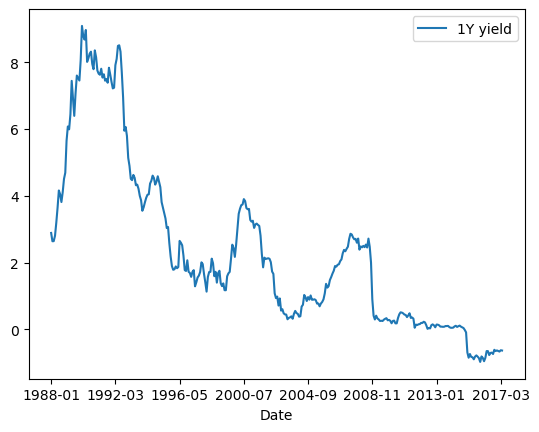

In [6]:
df_raw[df_raw['D0'] == '1J'].plot(x='Date', y='Value', label='1Y yield');

This is ok, but look at the x tick locations and labels. The dates selected seem rather arbitrary. Of course, we could clean those up, but it is indicitive of a larger problem.

Pandas and Matplotlib generally do a good job of picking good tick locations, and if they have not, it might be indicative of a problem, as is the case here. When debugging these problems, it is good to look at the data types of the columns of a frame. (https://pbpython.com/pandas_dtypes.html has a good overview of pandas data types)

In [7]:
df_raw.dtypes

Date      object
D0        object
Value    float64
dtype: object

The type 'object' means that pandas thinks our data column is a string. We need to tell pandas that it is a date column.

In [8]:
df = df_raw.copy()
df['Date'] = pd.to_datetime(df['Date'])
print(df.dtypes)
df.head()

Date     datetime64[ns]
D0               object
Value           float64
dtype: object


,Date,D0,Value
0,1988-01-01,1J,2.887
1,1988-01-01,2J,3.218
2,1988-01-01,3J,3.393
3,1988-01-01,4J,3.554
4,1988-01-01,5J,3.695


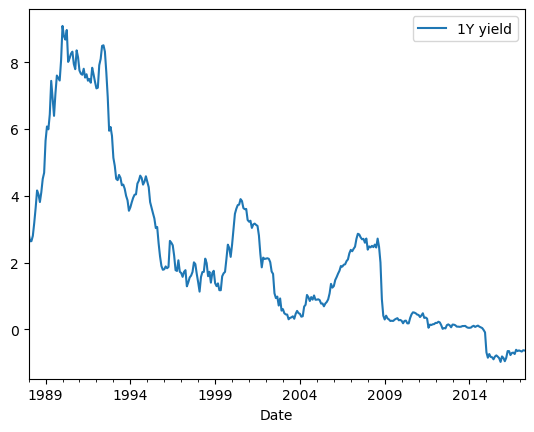

In [9]:
df[df['D0'] == '1J'].plot(x='Date', y='Value', label='1Y yield');

That looks much better!

# Style

The default MPL style is not so appealing, but there are many better ones available.

In [10]:
plt.style.available

['Solarize_Light2',
 '_classic_test_patch',
 '_mpl-gallery',
 '_mpl-gallery-nogrid',
 'bmh',
 'classic',
 'dark_background',
 'fast',
 'fivethirtyeight',
 'ggplot',
 'grayscale',
 'petroff10',
 'seaborn-v0_8',
 'seaborn-v0_8-bright',
 'seaborn-v0_8-colorblind',
 'seaborn-v0_8-dark',
 'seaborn-v0_8-dark-palette',
 'seaborn-v0_8-darkgrid',
 'seaborn-v0_8-deep',
 'seaborn-v0_8-muted',
 'seaborn-v0_8-notebook',
 'seaborn-v0_8-paper',
 'seaborn-v0_8-pastel',
 'seaborn-v0_8-poster',
 'seaborn-v0_8-talk',
 'seaborn-v0_8-ticks',
 'seaborn-v0_8-white',
 'seaborn-v0_8-whitegrid',
 'tableau-colorblind10']

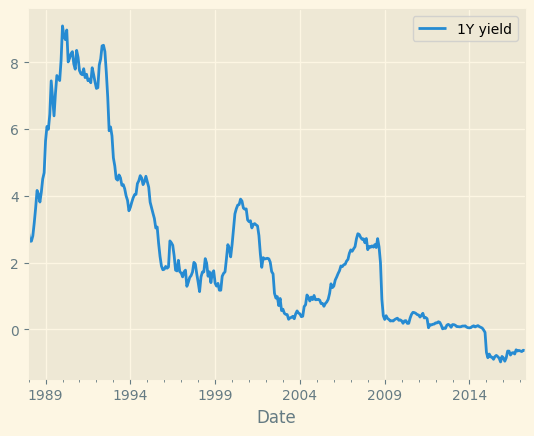

In [ ]:
with plt.style.context(('Solarize_Light2')):
    df[df['D0'] == '1J'].plot(x='Date', y='Value', label='1Y yield');

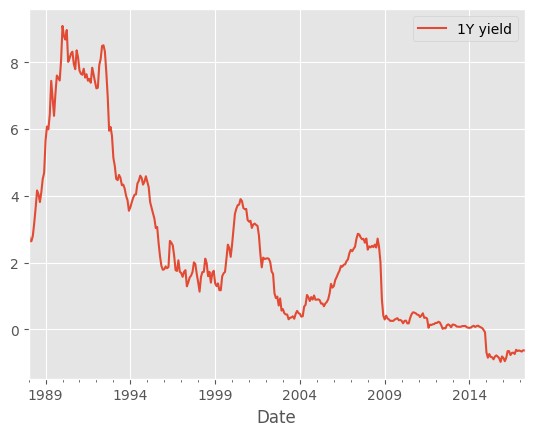

In [ ]:
with plt.style.context(('ggplot')):
    df[df['D0'] == '1J'].plot(x='Date', y='Value', label='1Y yield');

The [Seaborn](https://seaborn.pydata.org) library includes many nice styles.

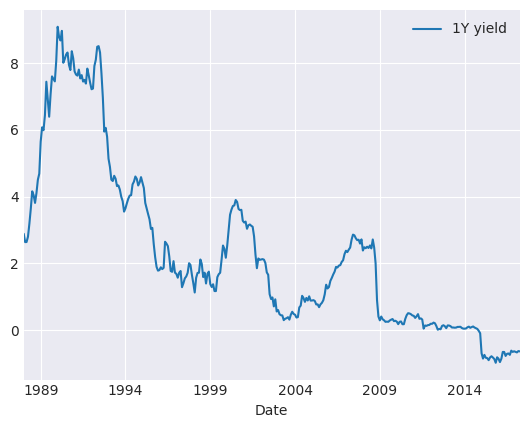

In [ ]:
with plt.style.context('seaborn-v0_8-darkgrid'):
    df[df['D0'] == '1J'].plot(x='Date', y='Value', label='1Y yield');

We don't want to set the style for every individual plot. Let us pick one we like and use it globally.

In [11]:
plt.style.use('seaborn-v0_8-darkgrid')
# sns.set() is another way of doing this

# Indexing

Pandas uses an `index` object to provide labels for rows and columns. The default row index is just the row number. For some data, this is fine, but if there is a semantically meaningful index, it will be easier to work with that than just a row number. Also, some pandas functions (like aggregation operations) return pandas objects with semantically meaninful indices. So, it makes sense to learn about [indexing and selecting data](https://pandas.pydata.org/docs/user_guide/indexing.html) and [multi-indexes](https://pandas.pydata.org/docs/user_guide/advanced.html).

Example: How can we get the yield over 1999 on 1-year bonds?

In [12]:
df[(df['Date'].dt.year == 1999) & (df['D0'] == '1J')]

,Date,D0,Value
1584,1999-01-01,1J,1.381
1596,1999-02-01,1J,1.293
1608,1999-03-01,1J,1.375
1620,1999-04-01,1J,1.171
1632,1999-05-01,1J,1.170
1644,1999-06-01,1J,1.588
1656,1999-07-01,1J,1.676
1668,1999-08-01,1J,1.720
1680,1999-09-01,1J,2.110
1692,1999-10-01,1J,2.536


This works, but is tedious and inefficient. A better way is to take advantage of the index. **An index must be unique,** so we need it to be made up of `Date` and `D0`.

In [13]:
df_indexed = df.set_index(['Date', 'D0'])
df_indexed

Value
Date       D0           
1988-01-01 1J   2.887000
           2J   3.218000
           3J   3.393000
           4J   3.554000
           5J   3.695000
...                  ...
2017-04-01 8J  -0.247314
           9J  -0.164550
           10J -0.095596
           20J  0.227055
           30J  0.335615

[4224 rows x 1 columns]

In [18]:
df_indexed_D0 = df.set_index(['D0', 'Date'])
df_indexed_D0.head(50)

,,Value
D0,Date,
1J,1988-01-01,2.887
2J,1988-01-01,3.218
3J,1988-01-01,3.393
4J,1988-01-01,3.554
5J,1988-01-01,3.695
6J,1988-01-01,3.810
7J,1988-01-01,3.904
8J,1988-01-01,3.980
9J,1988-01-01,4.041


Now we can ask directly for the data we are interested in -- 1-year bonds in 1999.

In [20]:
df_indexed.loc[('1999', '1J'), :]

,Value
Date,
1999-01-01,1.381
1999-02-01,1.293
1999-03-01,1.375
1999-04-01,1.171
1999-05-01,1.170
1999-06-01,1.588
1999-07-01,1.676
1999-08-01,1.720
1999-09-01,2.110


If we want to set up multiple criteria, we use a list `[]`.

In [22]:
df_indexed.loc[(['1999', '2000'], ['1J', '2J']), :]

Value
Date       D0       
1999-01-01 1J  1.381
           2J  1.568
2000-01-01 1J  2.538
           2J  2.829
1999-02-01 1J  1.293
1999-03-01 1J  1.375
1999-04-01 1J  1.171
1999-05-01 1J  1.170
1999-06-01 1J  1.588
1999-07-01 1J  1.676
1999-08-01 1J  1.720
1999-09-01 1J  2.110
1999-10-01 1J  2.536
1999-11-01 1J  2.435
1999-12-01 1J  2.170
2000-02-01 1J  2.984
2000-03-01 1J  3.459
2000-04-01 1J  3.612
2000-05-01 1J  3.721
2000-06-01 1J  3.738
2000-07-01 1J  3.901
2000-08-01 1J  3.843
2000-09-01 1J  3.633
2000-10-01 1J  3.598
2000-11-01 1J  3.607
2000-12-01 1J  3.277
1999-02-01 2J  1.491
1999-03-01 2J  1.554
1999-04-01 2J  1.376
1999-05-01 2J  1.410
1999-06-01 2J  1.929
1999-07-01 2J  2.092
1999-08-01 2J  2.204
1999-09-01 2J  2.527
1999-10-01 2J  2.991
1999-11-01 2J  2.834
1999-12-01 2J  2.539
2000-02-01 2J  3.250
2000-03-01 2J  3.637
2000-04-01 2J  3.765
2000-05-01 2J  3.879
2000-06-01 2J  3.800
2000-07-01 2J  3.943
2000-08-01 2J  3.804
2000-09-01 2J  3.615
2000-10-01 2J  3.578
2000-11-01 2J  3.614
2000-12-01 2J  3.232

Plotting also becomes easier, because pandas by default assumes that the index should be on the x-axis. (Though we do need, in this case, to drop the second level from the index with `reset_index(1)`)
<br><br>



- `reset_index` -> use the default index. 
<br>we created an additional level of index when we `set_index`,  when we `reset_index` -> back to the original level

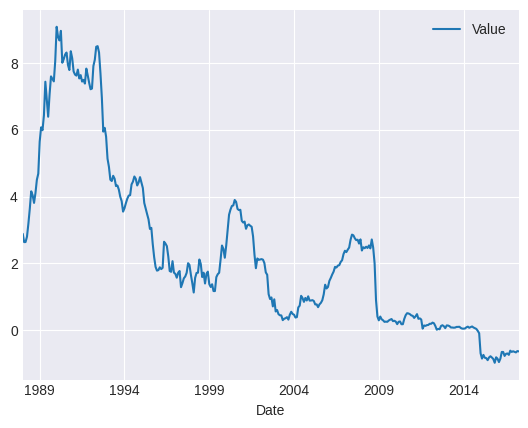

In [ ]:
df_indexed.loc[(slice(None), '1J'), :].reset_index(1).plot(label='1Y yield');       # reset -> neat xlabel

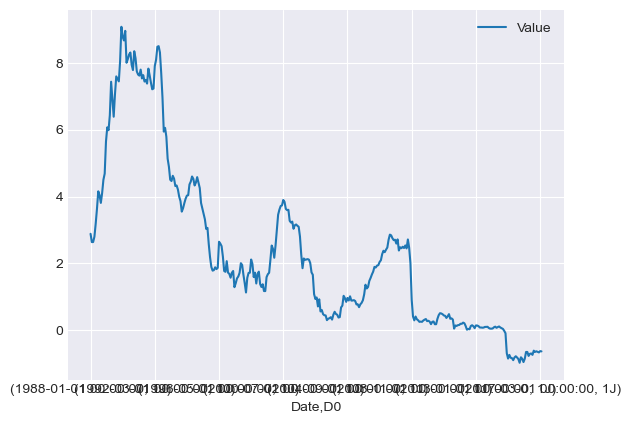

In [26]:
# what happened if we don't reset?
df_indexed.loc[(slice(None), '1J'), :].plot(label='1Y yield');

# the xlabel will squeeze up together

And we can do things like get yields on 1 and 2-year bonds from Nov 1999 to Feb 2000.

In [ ]:
df_indexed.loc[(slice('1999-11', '2000-02'), ['1J', '2J']), :]

Value
Date       D0       
1999-11-01 1J  2.435
           2J  2.834
1999-12-01 1J  2.170
           2J  2.539
2000-01-01 1J  2.538
           2J  2.829
2000-02-01 1J  2.984
           2J  3.250

# subplots vs plot

There are multiple ways to plot. We can use matplotlib alone, pandas alone, or a mix. Let us convert our frame into a wide-form frame, since this will be easier to work with.

In [ ]:
df_wide = df_indexed.unstack(1)['Value']
df_wide.head()

D0,10J,1J,20J,2J,30J,3J,4J,5J,6J,7J,8J,9J
Date,,,,,,,,,,,,
1988-01-01,4.092,2.887,4.326,3.218,NaN,3.393,3.554,3.695,3.810,3.904,3.980,4.041
1988-02-01,4.098,2.638,4.332,2.990,NaN,3.271,3.498,3.672,3.804,3.905,3.984,4.047
1988-03-01,3.998,2.641,4.255,3.263,NaN,3.573,3.734,3.823,3.878,3.916,3.946,3.972
1988-04-01,3.965,2.800,4.200,3.250,NaN,3.467,3.594,3.684,3.757,3.819,3.874,3.923
1988-05-01,4.127,3.191,4.247,3.602,NaN,3.802,3.909,3.974,4.019,4.054,4.082,4.106


## matplotlib pure

This is one of many ways of using matplotlib. There are other solutions as well.

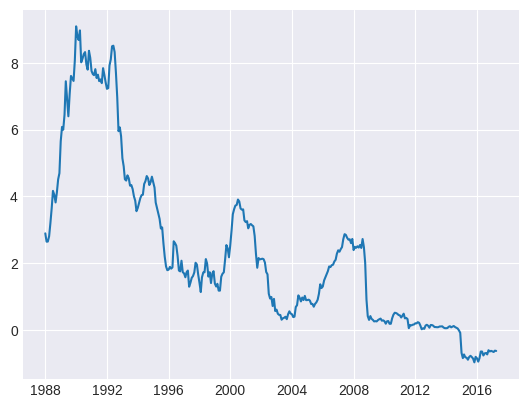

In [ ]:
fig, ax = plt.subplots()
ax.plot(df_wide.index, df_wide['1J']);

## pandas pure

When using pandas, it will create a figure and axis for you if none is provided.

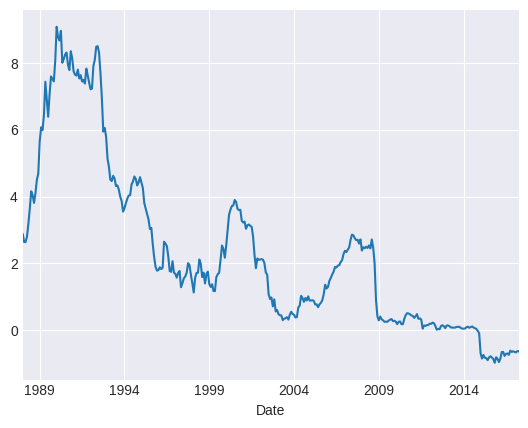

In [ ]:
df_wide['1J'].plot();

## mixed

The nice thing is, you don't have to pick. Pandas uses matplotlib, and pandas (and most seaborn) plotting functions accept MPL objects as arguments. You can have pandas plot into an axis you create outside in matplotlib by yourself.

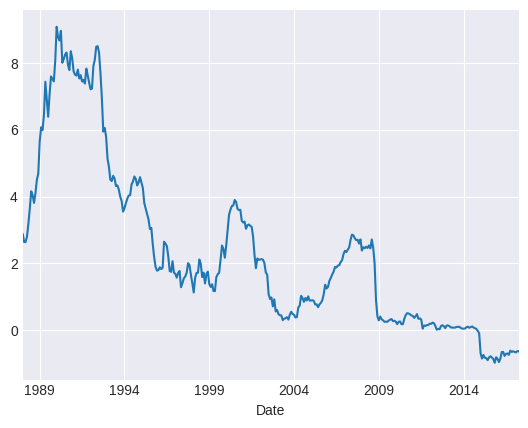

In [ ]:
fig, ax = plt.subplots()
df_wide['1J'].plot(ax=ax);

Why do this? Because MPL gives more control of features of the figure, but pandas is often a bit easier to use. This way, it is easy to create a plot with multiple subplots freely. For example...

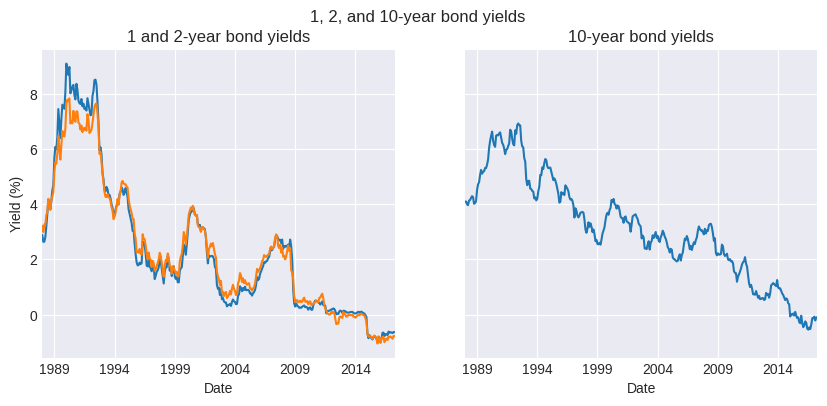

In [ ]:
fig, axs = plt.subplots(1, 2, sharex=True, sharey=True, figsize=(10, 4))
df_wide['1J'].plot(ax=axs[0])
df_wide['2J'].plot(ax=axs[0])
df_wide['10J'].plot(ax=axs[1])
axs[0].set_ylabel("Yield (%)")
axs[0].set_title("1 and 2-year bond yields")
axs[1].set_title("10-year bond yields")
fig.suptitle("1, 2, and 10-year bond yields");

# Altair

[Altair](https://altair-viz.github.io) and [Bokeh](https://docs.bokeh.org/en/latest/) are two plotting libraries that are newer than MPL. They have certain advantages. They render to HTML, making it easy to add interactions (mouse-over tooltips), and they have easier to understand APIs. They have disadvantages as well, though. Altair, for example, does not give you complete control of your plot, the way matplotlib does.

Every python data scientists need to be comfortable with matplotlib, because you will encounter it everywhere, but you may want to look at Altair, or Bokeh, or Holoviews, or another library for your projects.

Here is an example of the same plot in Altair.

In [32]:
import altair as alt

In [33]:
alt.Chart(df[df['D0'] == '1J']).mark_line().encode(
    x='Date',
    y='Value'
)

alt.Chart(...)

### tooltip

With altair, we can easily add tooltips. Mouse over a point on the plot below.

In [34]:
alt.Chart(df[df['D0'] == '1J']).mark_line().encode(
    x='Date',
    y='Value',
    tooltip=['Date', 'Value']
)

alt.Chart(...)

And defining more complex mappings form data to visual is also easy.

In [ ]:
alt.Chart(df[df['D0'].isin(['1J', '2J', '10J'])]).mark_line().encode(
    x='Date',
    y='Value',
    color='D0:N',           # :N tells altair about the nominal axis
    tooltip=['Date', 'Value', 'D0']
)

alt.Chart(...)